In [1]:
from pandas import read_csv
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, chi2

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = read_csv('01-dados/diabetes.csv',
                names=['Pregnancy', 'Glucose', 'BloodPressure' ,'SkinfoldThickness', 'Insulin', 'BodyMassIndex', 'DiabetesPedigreeFunction', 'Age', 'Class'])

In [3]:
data.head()

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancy                 768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinfoldThickness         768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BodyMassIndex             768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


<AxesSubplot:>

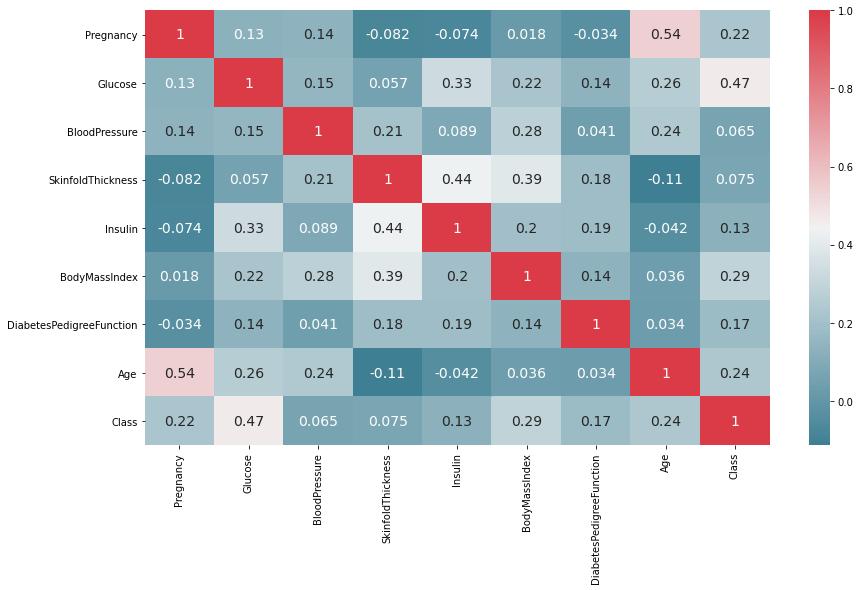

In [5]:
plt.subplots(figsize=(14,8))
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(data.corr(), cmap=cmap, annot=True, annot_kws = {'fontsize' : 14})

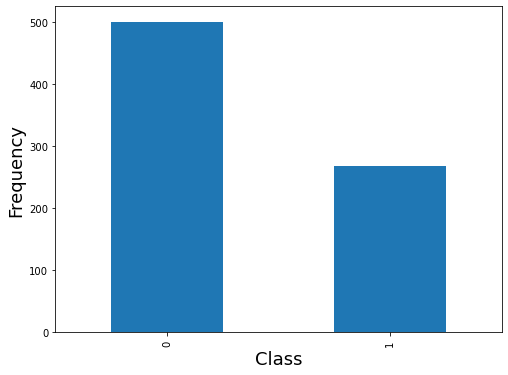

In [6]:
data['Class'].value_counts().plot(kind='bar', figsize=(8,6))
plt.xlabel('Class', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

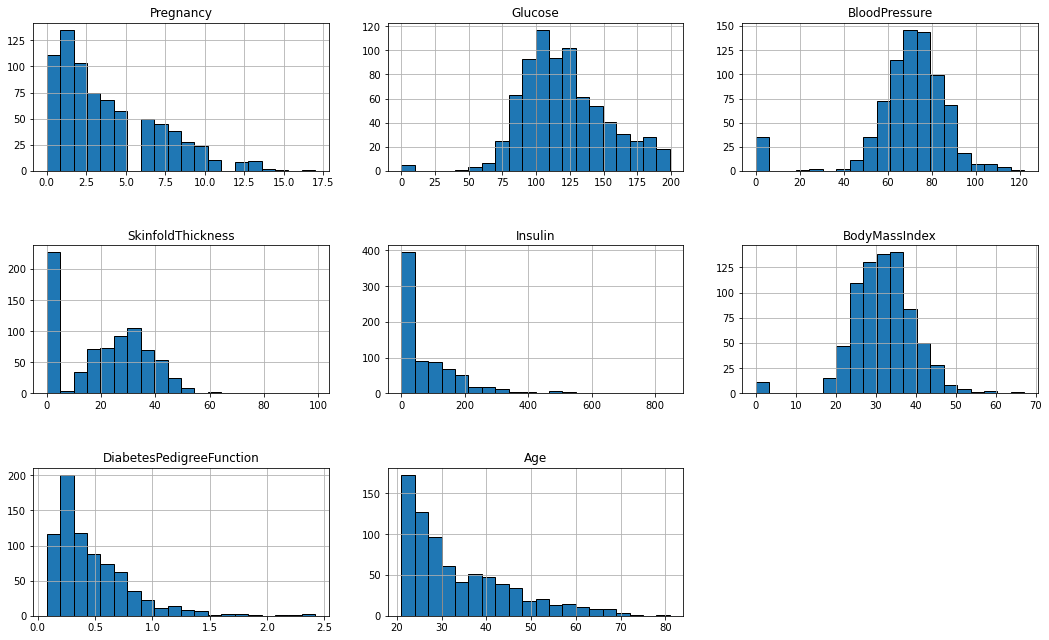

In [7]:
columns=data.columns[:8]
plt.subplots(figsize=(18,15))
tamanho=len(columns)
for i,j in zip(columns,range(tamanho)):
    plt.subplot((tamanho/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20, edgecolor='black')
    plt.title(i)
plt.show()

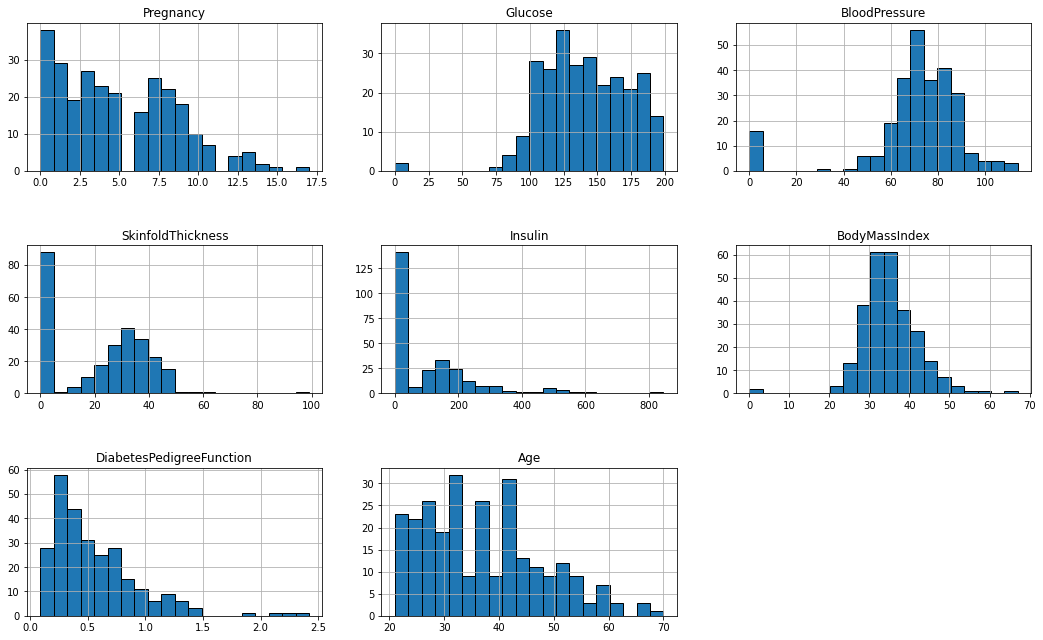

In [8]:
# Caso de biabetes
p = data[data['Class']==1]
columns = data.columns[:8]
plt.subplots(figsize=(18,15))
tamanho = len(columns)
for i,j in zip(columns,range(tamanho)):
    plt.subplot((tamanho/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=.5)
    p[i].hist(bins=20, edgecolor='black')
    plt.title(i)
plt.show()    

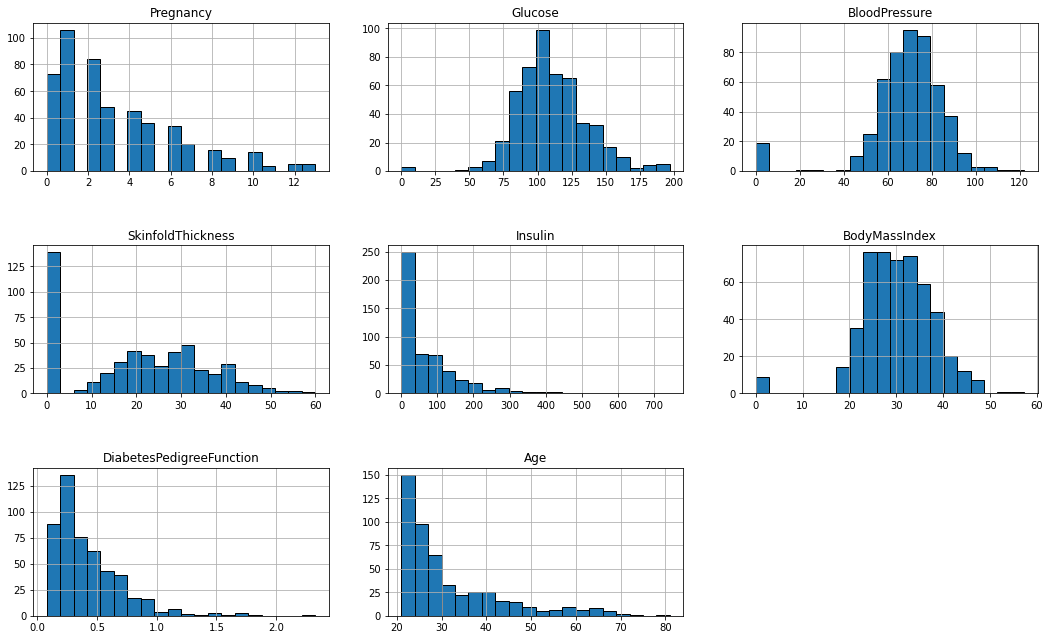

In [9]:
# Caso de biabetes
p = data[data['Class']==0]
columns = data.columns[:8]
plt.subplots(figsize=(18,15))
tamanho = len(columns)
for i,j in zip(columns,range(tamanho)):
    plt.subplot((tamanho/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=.5)
    p[i].hist(bins=20, edgecolor='black')
    plt.title(i)
plt.show()   

Pregnancy                      AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinfoldThickness              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BodyMassIndex               AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Class                          AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

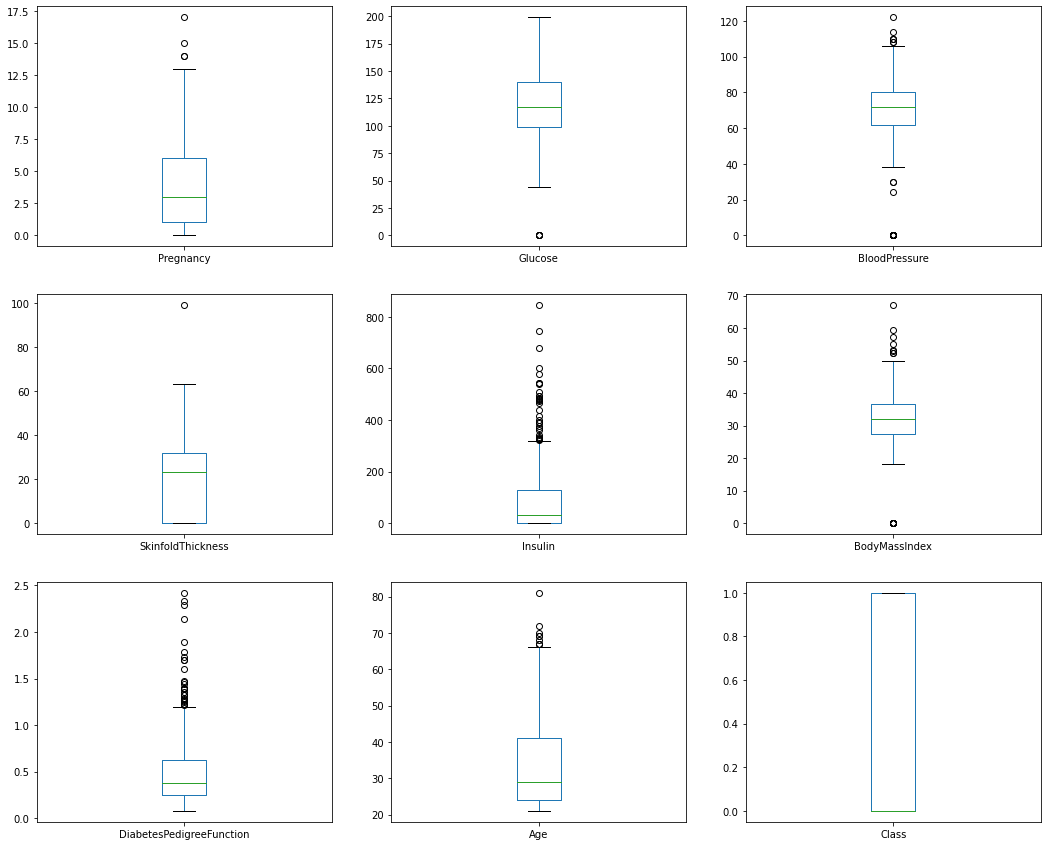

In [10]:
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(18,15))

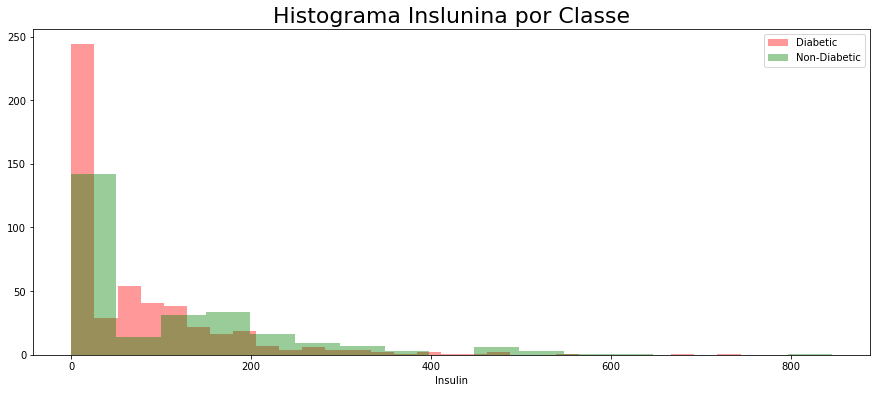

In [11]:
plt.figure(figsize=(15,6))
c = data.groupby(data['Insulin']).Class.count().reset_index()
sns.distplot(data[data.Class == 0]['Insulin'], color='red', kde=False, label='Diabetic')
sns.distplot(data[data.Class == 1]['Insulin'], color='green', kde=False, label='Non-Diabetic')
plt.legend()
plt.title('Histograma Inslunina por Classe', fontsize=22)
plt.show()

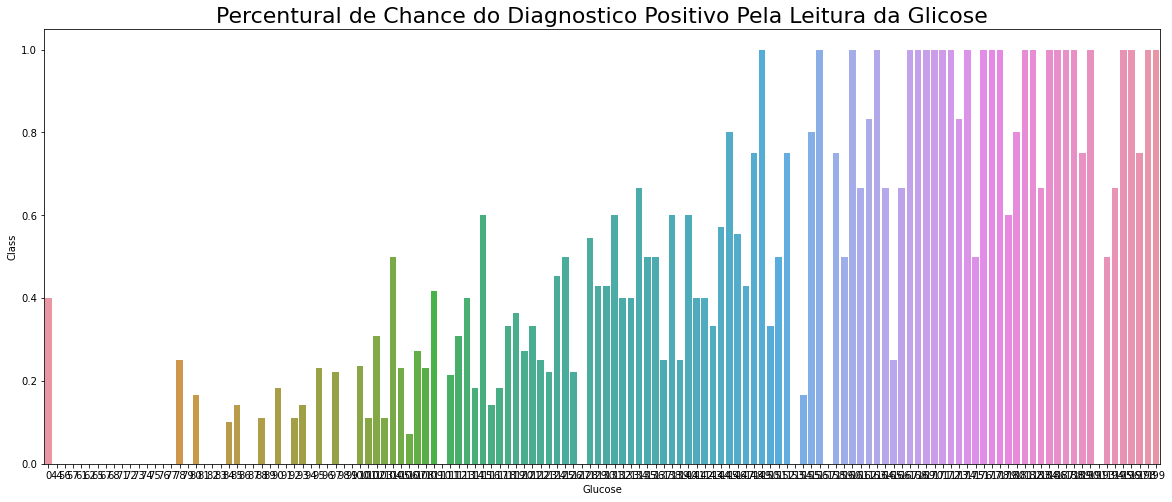

In [12]:
plt.figure(figsize=(20,8))
g = data.groupby('Glucose').Class.mean().reset_index()
sns.barplot(g.Glucose, g.Class)
plt.title('Percentural de Chance do Diagnostico Positivo Pela Leitura da Glicose', fontsize=22)
plt.show()

# Limpando os Dados 

In [13]:
print('Valores missing na Feature Glucose: ' + repr(data[data.Glucose == 0].shape[0]))
print(data[data.Glucose == 0].groupby('Class')['Class'].count())

Valores missing na Feature Glucose: 5
Class
0    3
1    2
Name: Class, dtype: int64


In [14]:
g = data[(data['Glucose']==0)]
data[(data['Glucose']== 0) & (data['Class'] == 0)] = g[g['Class']== 0].replace(0, data[(data['Class']== 0)].mean())
data[(data['Glucose']== 0) & (data['Class'] == 1)] = g[g['Class']== 1].replace(0, data[(data['Class']== 1)].mean())

In [15]:
print('Valores missing na Feature BloodPressure: ' + repr(data[data.BloodPressure==0].shape[0]))
print(data[data.BloodPressure==0].groupby('Class')['Class'].count())

Valores missing na Feature BloodPressure: 35
Class
0    19
1    16
Name: Class, dtype: int64


In [16]:
b = data[(data['BloodPressure']==0)]
data[(data['BloodPressure']==0) & (data['Class']==0)] = b[b['BloodPressure']==0].replace(0, data[(data['Class']==0)].mean())
data[(data['BloodPressure']==1) & (data['Class']==1)] = b[b['BloodPressure']==1].replace(0, data[(data['Class']==1)].mean())

In [17]:
print('Valores missing na Feature SkinfoldThickness: ' + repr(data[data.SkinfoldThickness == 0].shape[0]))
print(data[data.SkinfoldThickness==0].groupby('Class')['Class'].count())

Valores missing na Feature SkinfoldThickness: 209
Class
0    121
1     88
Name: Class, dtype: int64


In [18]:
s = data[(data['SkinfoldThickness'] == 0)]
data[(data['SkinfoldThickness']==0) & (data['Class']==0)] = s[s['Class']==0].replace(0, data[(data['Class']==0)].mean())
data[(data['SkinfoldThickness']==0) & (data['Class']==1)] = s[s['Class']==1].replace(0, data[(data['Class']==1)].mean())

In [19]:
# Buscando valore zero
print('Casos anormais: ' + repr(data[data.SkinfoldThickness > 60].shape[0]))
print(data[data.SkinfoldThickness > 60]['SkinfoldThickness'])
print(data[data.SkinfoldThickness > 60].groupby('Class')['Class'].count())

Casos anormais: 2
446    63.0
580    99.0
Name: SkinfoldThickness, dtype: float64
Class
1    2
Name: Class, dtype: int64


In [20]:
# Substituindo o valor 99.0 pela média
data['SkinfoldThickness'].iloc[579] = data['SkinfoldThickness'].mean()

In [21]:
print('Valores Missing na Feature Insulin: ' + repr(data[data.Insulin == 0].shape[0]))
print(data[data.Insulin == 0].groupby('Class')['Class'].count())

Valores Missing na Feature Insulin: 142
Class
0    94
1    48
Name: Class, dtype: int64


In [22]:
i = data[(data['Insulin'] == 0)]
data[(data['Insulin']==0) & (data['Class']==0)] = i[i['Class']==0].replace(0, data[(data['Class']==0)].mean())
data[(data['Insulin']==0) & (data['Class']==1)] = i[i['Class']==1].replace(0, data[(data['Class']==1)].mean())

In [23]:
print('Valores Missing na Feature BodyMassIndex: ' + repr(data[data.BodyMassIndex == 0].shape[0]))
print(data[data.BodyMassIndex == 0].groupby('Class')['Class'].count())

Valores Missing na Feature BodyMassIndex: 1
Class
0    1
Name: Class, dtype: int64


In [24]:
# Substitua o valor zero pelo valor médio das classes
b = data[(data['BodyMassIndex']== 0)] 
data[(data['BodyMassIndex']== 0) & (data['Class'] == 0)] = b[b['Class']== 0].replace(0, data[(data['Class']== 0)].mean())
data[(data['BodyMassIndex']== 0) & (data['Class'] == 1)] = b[b['Class']== 1].replace(0, data[(data['Class']== 1)].mean())

In [25]:
data.describe()

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.125533,121.691999,72.272987,26.652535,124.116945,32.440883,0.471876,33.240885,0.348958
std,3.202550,30.461151,12.116177,9.195024,92.045039,6.879985,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.371904,71.691720,27.500000,0.243750,24.000000,0.000000
50%,3.324384,117.000000,72.000000,23.000000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,134.276552,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


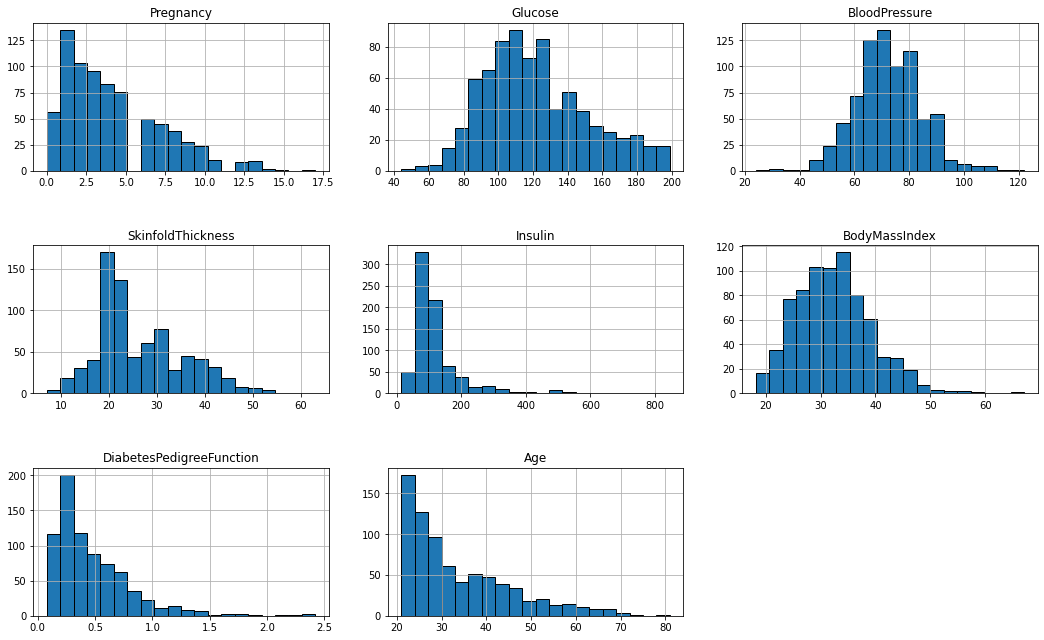

In [26]:
columns=data.columns[:8]
plt.subplots(figsize=(18,15))
tamanho=len(columns)
for i,j in zip(columns,range(tamanho)):
    plt.subplot((tamanho/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20, edgecolor='black')
    plt.title(i)
plt.show()

## Balanceando os Dados

In [27]:
data['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

In [28]:
data1 = data.drop(columns=['Class'])

In [29]:
x, y = SMOTE().fit_sample(data1, data.Class)

In [30]:
x.shape

(1000, 8)

In [31]:
y.shape

(1000,)

In [32]:
x = MinMaxScaler().fit_transform(x)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# KNN 

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
vl = knn.predict(x_test)
print(confusion_matrix(y_test, vl))
print(classification_report(y_test, vl))

[[82 22]
 [25 71]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       104
           1       0.76      0.74      0.75        96

    accuracy                           0.77       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.77      0.76       200



Text(0, 0.5, 'Erro')

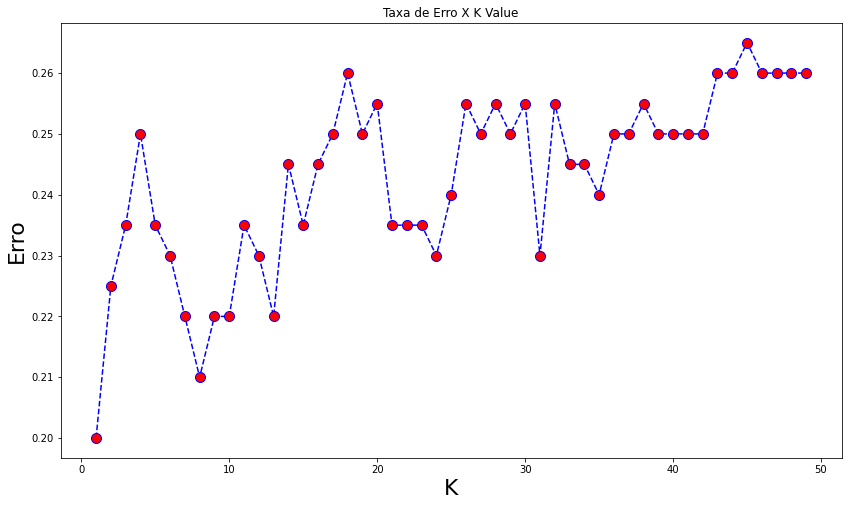

In [35]:
# Melhor valor para K
result = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    result.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(14,8))
plt.plot(range(1,50),result, color='b', linestyle='dashed',marker='o', markerfacecolor='red', markersize=10)
plt.title('Taxa de Erro X K Value')
plt.xlabel('K', fontsize=22)
plt.ylabel('Erro', fontsize=22)

In [36]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
vl = knn.predict(x_test)
print(confusion_matrix(y_test, vl))
print(classification_report(y_test, vl))

[[80 24]
 [16 80]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       104
           1       0.77      0.83      0.80        96

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



# Decision Tree Classifier

In [37]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
prev = dtc.predict(x_test)
print(confusion_matrix(prev, y_test))
print(classification_report(y_test,prev))

[[92 20]
 [12 76]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       104
           1       0.86      0.79      0.83        96

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [38]:
params = {'max_depth': [1,3,5,8,10,12,None],          
          'min_samples_split': [8,10,14,1],
          'criterion': ['gini', 'entropy'],}

rscv_dtc = RandomizedSearchCV(dtc, param_distributions=params, n_iter=25, return_train_score=True, n_jobs=-1)
rscv_dtc.fit(x_train, y_train)
melhor = rscv_dtc.best_estimator_
print(melhor)
prev = melhor.predict(x_test) 
print(confusion_matrix(prev, y_test))
print(classification_report(y_test,prev))

DecisionTreeClassifier(max_depth=5, min_samples_split=8)
[[93 17]
 [11 79]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       104
           1       0.88      0.82      0.85        96

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



# Extra Tree Classifier

In [39]:
etc = ExtraTreesClassifier(n_estimators=500)
etc.fit(x_train, y_train)
prev = etc.predict(x_test)
print(confusion_matrix(prev, y_test))
print(classification_report(y_test,prev))

[[94 11]
 [10 85]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       104
           1       0.89      0.89      0.89        96

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.90      0.89       200



In [40]:
params = {'max_depth': [1,3,5,8,10,12,None],
          'max_features': [2,3,4,5,6,7,8,9],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20],
          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'n_estimators': [100,250,500,750,1000],
          'bootstrap':[True,False]}

rscv_etc = RandomizedSearchCV(etc, param_distributions=params, n_iter=35, return_train_score=True, n_jobs=-1)
rscv_etc.fit(x_train, y_train)
prev = rscv_etc.predict(x_test)
print(confusion_matrix(prev, y_test))
print(classification_report(y_test,prev))

[[94 14]
 [10 82]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       104
           1       0.89      0.85      0.87        96

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



# Random Forest Classifier

In [41]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=50)
rfc.fit(x_train, y_train)
prev = rfc.predict(x_test)
print(confusion_matrix(prev, y_test))
print(classification_report(y_test,prev))

[[96 13]
 [ 8 83]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       104
           1       0.91      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200



In [42]:
params = {'bootstrap': [True, False],
           'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10],
           'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rscv_rfc = RandomizedSearchCV(rfc, param_distributions=params, n_iter=35, return_train_score=True,n_jobs=-1)
rscv_rfc.fit(x_train, y_train)
prev = rscv_rfc.predict(x_test)
print(confusion_matrix(prev, y_test))
print(classification_report(y_test,prev))

[[96 15]
 [ 8 81]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       104
           1       0.91      0.84      0.88        96

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.89      0.88       200



# Feature Selection

In [43]:
x_4 = SelectKBest(chi2, k=4).fit_transform(x,y)
x_5 = SelectKBest(chi2, k=5).fit_transform(x,y)

In [44]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.2)
x_train5, x_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.2)

# Decision Tree Classifier

In [45]:
dtc = DecisionTreeClassifier()

params = {'max_depth': [1,3,5,8,10,12,None],          
          'min_samples_split': [8,10,14,1],
          'criterion': ['gini', 'entropy'],}

rscv_dtc4 = RandomizedSearchCV(dtc, param_distributions=params, n_iter=25, return_train_score=True, n_jobs=-1)
rscv_dtc4.fit(x_train4, y_train4)
melhor4 = rscv_dtc4.best_estimator_
print(melhor4)
prev4 = melhor4.predict(x_test4) 
print(confusion_matrix(prev4, y_test4))
print(classification_report(y_test4,prev4))

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=14)
[[84 14]
 [11 91]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        95
           1       0.89      0.87      0.88       105

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



In [46]:
dtc = DecisionTreeClassifier()

params = {'max_depth': [1,3,5,8,10,12,None],          
          'min_samples_split': [8,10,14,1],
          'criterion': ['gini', 'entropy'],}

rscv_dtc5 = RandomizedSearchCV(dtc, param_distributions=params, n_iter=25, return_train_score=True, n_jobs=-1)
rscv_dtc5.fit(x_train5, y_train5)
melhor5 = rscv_dtc5.best_estimator_
print(melhor5)
prev5 = melhor5.predict(x_test5) 
print(confusion_matrix(prev5, y_test5))
print(classification_report(y_test5,prev5))

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=8)
[[79 14]
 [15 92]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        94
           1       0.86      0.87      0.86       106

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



# Extra Trees Classifier

In [47]:
etc = ExtraTreesClassifier(n_estimators=500)

params = {'max_depth': [1,3,5,8,10,12,None],
          'max_features': [2,3,4,5,6,7,8,9],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20],
          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
          'bootstrap':[True,False]}

rscv_etc = RandomizedSearchCV(etc, param_distributions=params, n_iter=35, return_train_score=True, n_jobs=-1)
rscv_etc.fit(x_train4, y_train4)
prev = rscv_etc.predict(x_test4)
print(confusion_matrix(prev, y_test4))
print(classification_report(y_test4,prev))

[[82  7]
 [13 98]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        95
           1       0.88      0.93      0.91       105

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [48]:
etc = ExtraTreesClassifier(n_estimators=500)

params = {'max_depth': [1,3,5,8,10,12,None],
          'max_features': [2,3,4,5,6,7,8,9],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20],
          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
          'bootstrap':[True,False]}

rscv_etc = RandomizedSearchCV(etc, param_distributions=params, n_iter=35, return_train_score=True, n_jobs=-1)
rscv_etc.fit(x_train5, y_train5)
prev = rscv_etc.predict(x_test5)
print(confusion_matrix(prev, y_test5))
print(classification_report(y_test5,prev))

[[83  8]
 [11 98]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        94
           1       0.90      0.92      0.91       106

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



# Random Forest Classifier

In [49]:
rfc = RandomForestClassifier()

params = {'bootstrap': [True, False],
           'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10],
           'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rscv_rfc = RandomizedSearchCV(rfc, param_distributions=params, n_iter=35, return_train_score=True,n_jobs=-1)
rscv_rfc.fit(x_train4, y_train4)
prev = rscv_rfc.predict(x_test4)
print(confusion_matrix(prev, y_test4))
print(classification_report(y_test4,prev))

[[ 85   5]
 [ 10 100]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        95
           1       0.91      0.95      0.93       105

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



In [50]:
rscv_rfc = RandomizedSearchCV(rfc, param_distributions=params, n_iter=35, return_train_score=True,n_jobs=-1)
rscv_rfc.fit(x_train5, y_train5)
prev = rscv_rfc.predict(x_test5)
print(confusion_matrix(prev, y_test5))
print(classification_report(y_test5,prev))

[[ 86   6]
 [  8 100]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        94
           1       0.93      0.94      0.93       106

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

